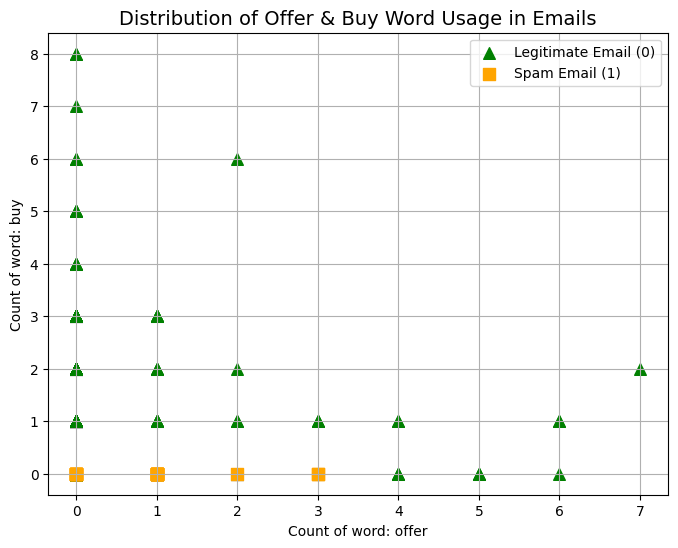

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ----------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------
df = pd.read_csv("emails.csv")  # Replace with your file name

# Drop Email ID column
df = df.drop(df.columns[0], axis=1)

# ----------------------------------------------------------
# AUTO-DETECT LABEL COLUMN
# ----------------------------------------------------------
possible_label_cols = ["label", "Label", "spam", "class", "is_spam", "Category"]

label_col = None
for col in df.columns:
    if col in possible_label_cols:
        label_col = col
        break

if label_col is None:
    print(df.columns)
    raise ValueError("Label column not found. Check column names!")

# ----------------------------------------------------------
# AUTO-DETECT WORD COLUMNS: "offer" & "buy"
# ----------------------------------------------------------
offer_col = [c for c in df.columns if "offer" in c.lower()][0]
buy_col   = [c for c in df.columns if "buy" in c.lower()][0]

x = df[offer_col]
y = df[buy_col]
labels = df[label_col]

# ----------------------------------------------------------
# PLOT (offer vs buy)
# ----------------------------------------------------------
plt.figure(figsize=(8,6))

# Legitimate emails (label = 0)
plt.scatter(x[labels == 0],
            y[labels == 0],
            c="green",
            marker="^",
            s=70,
            label="Legitimate Email (0)")

# Spam emails (label = 1)
plt.scatter(x[labels == 1],
            y[labels == 1],
            c="orange",
            marker="s",
            s=70,
            label="Spam Email (1)")

plt.title("Distribution of Offer & Buy Word Usage in Emails", fontsize=14)
plt.xlabel(f"Count of word: {offer_col}")
plt.ylabel(f"Count of word: {buy_col}")

plt.legend()
plt.grid(True)
plt.show()

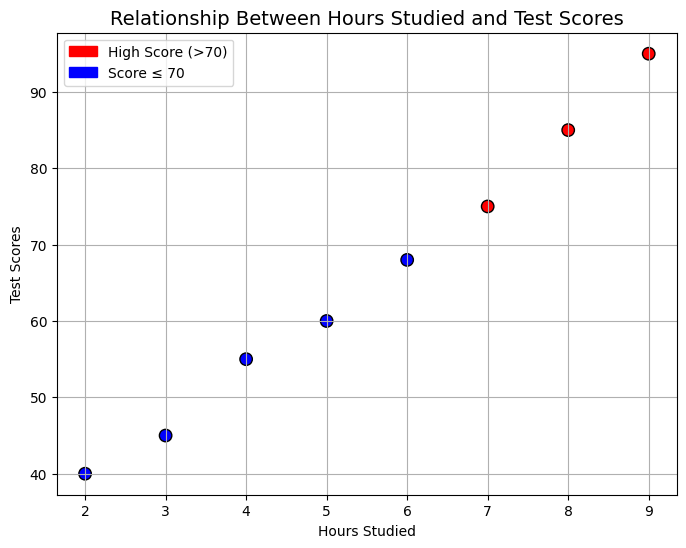

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Example data
hours_studied = [2, 3, 4, 5, 6, 7, 8, 9]
test_scores = [40, 45, 55, 60, 68, 75, 85, 95]

# Color logic
colors = ["red" if score > 70 else "blue" for score in test_scores]

plt.figure(figsize=(8,6))
plt.scatter(hours_studied, test_scores,
            c=colors, s=80, edgecolor='black')

plt.title("Relationship Between Hours Studied and Test Scores", fontsize=14)
plt.xlabel("Hours Studied")
plt.ylabel("Test Scores")

# Legend
plt.legend(handles=[
    mpatches.Patch(color='red', label='High Score (>70)'),
    mpatches.Patch(color='blue', label='Score ≤ 70')
])

plt.grid(True)
plt.show()
